<a href="https://colab.research.google.com/github/NHS-ML-AI/CONTAINER_OR_NOT/blob/main/Model_CONTAINER_DETECTION_v1_YOLOv8_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Sep 11 19:50:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/235.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

## Inference with Pre-trained COCO Model

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 6.25M/6.25M [00:00<00:00, 129MB/s]


100%|██████████| 104k/104k [00:00<00:00, 46.9MB/s]


image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 104.5ms
Speed: 10.7ms preprocess, 104.5ms inference, 735.2ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="842eH5st27fccsurRelP")
project = rf.workspace("container-rnvq9").project("container_or_not")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.92, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to CONTAINER_OR_NOT-1 in yolov8:: 100%|██████████| 2393/2393 [00:00<00:00, 4850.17it/s]


## Custom Training

In [ ]:
%cd {HOME}/datasets/CONTAINER_OR_NOT-1
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=50 imgsz=640 plots=True

/content/datasets/CONTAINER_OR_NOT-1
100% 6.25M/6.25M [00:00<00:00, 191MB/s]
Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

In [ ]:
!ls {HOME}/datasets/TRUCK_DIRECTION_DATASET-3/runs/detect/train/

ls: cannot access '/content/datasets/TRUCK_DIRECTION_DATASET-3/runs/detect/train/': No such file or directory


/content


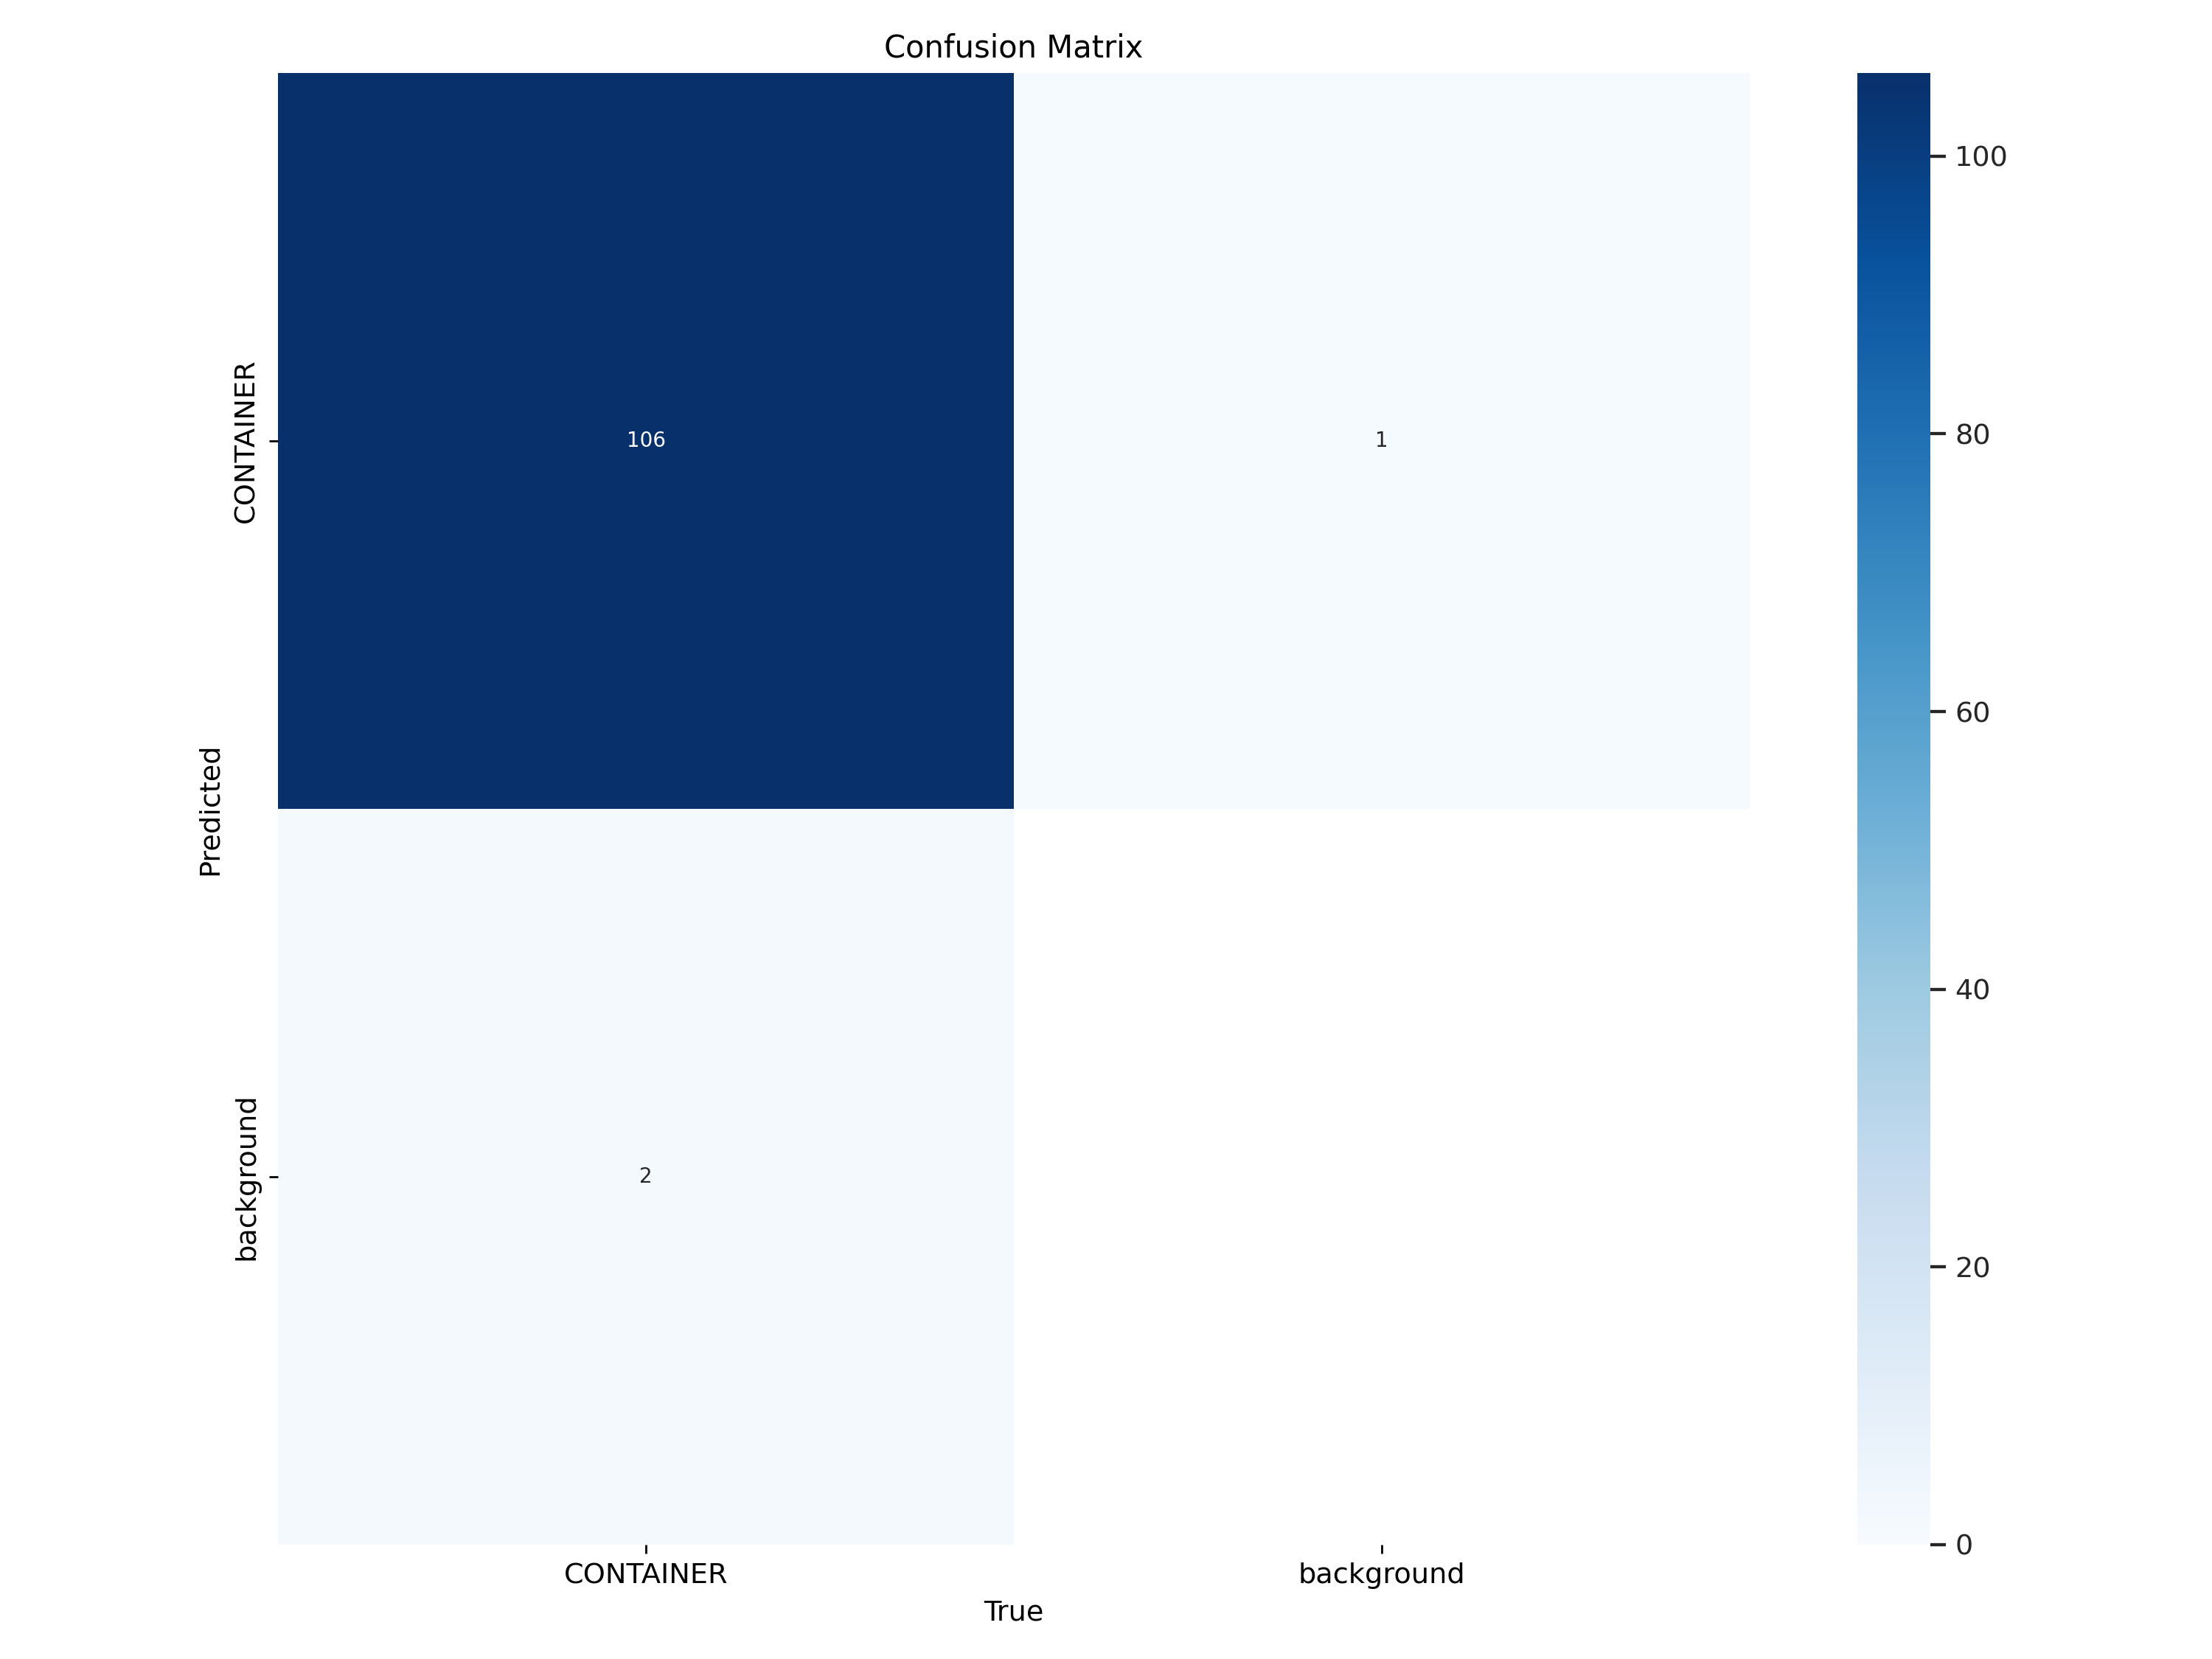

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/CONTAINER_OR_NOT-1/runs/detect/train/confusion_matrix.png', width=600)

/content


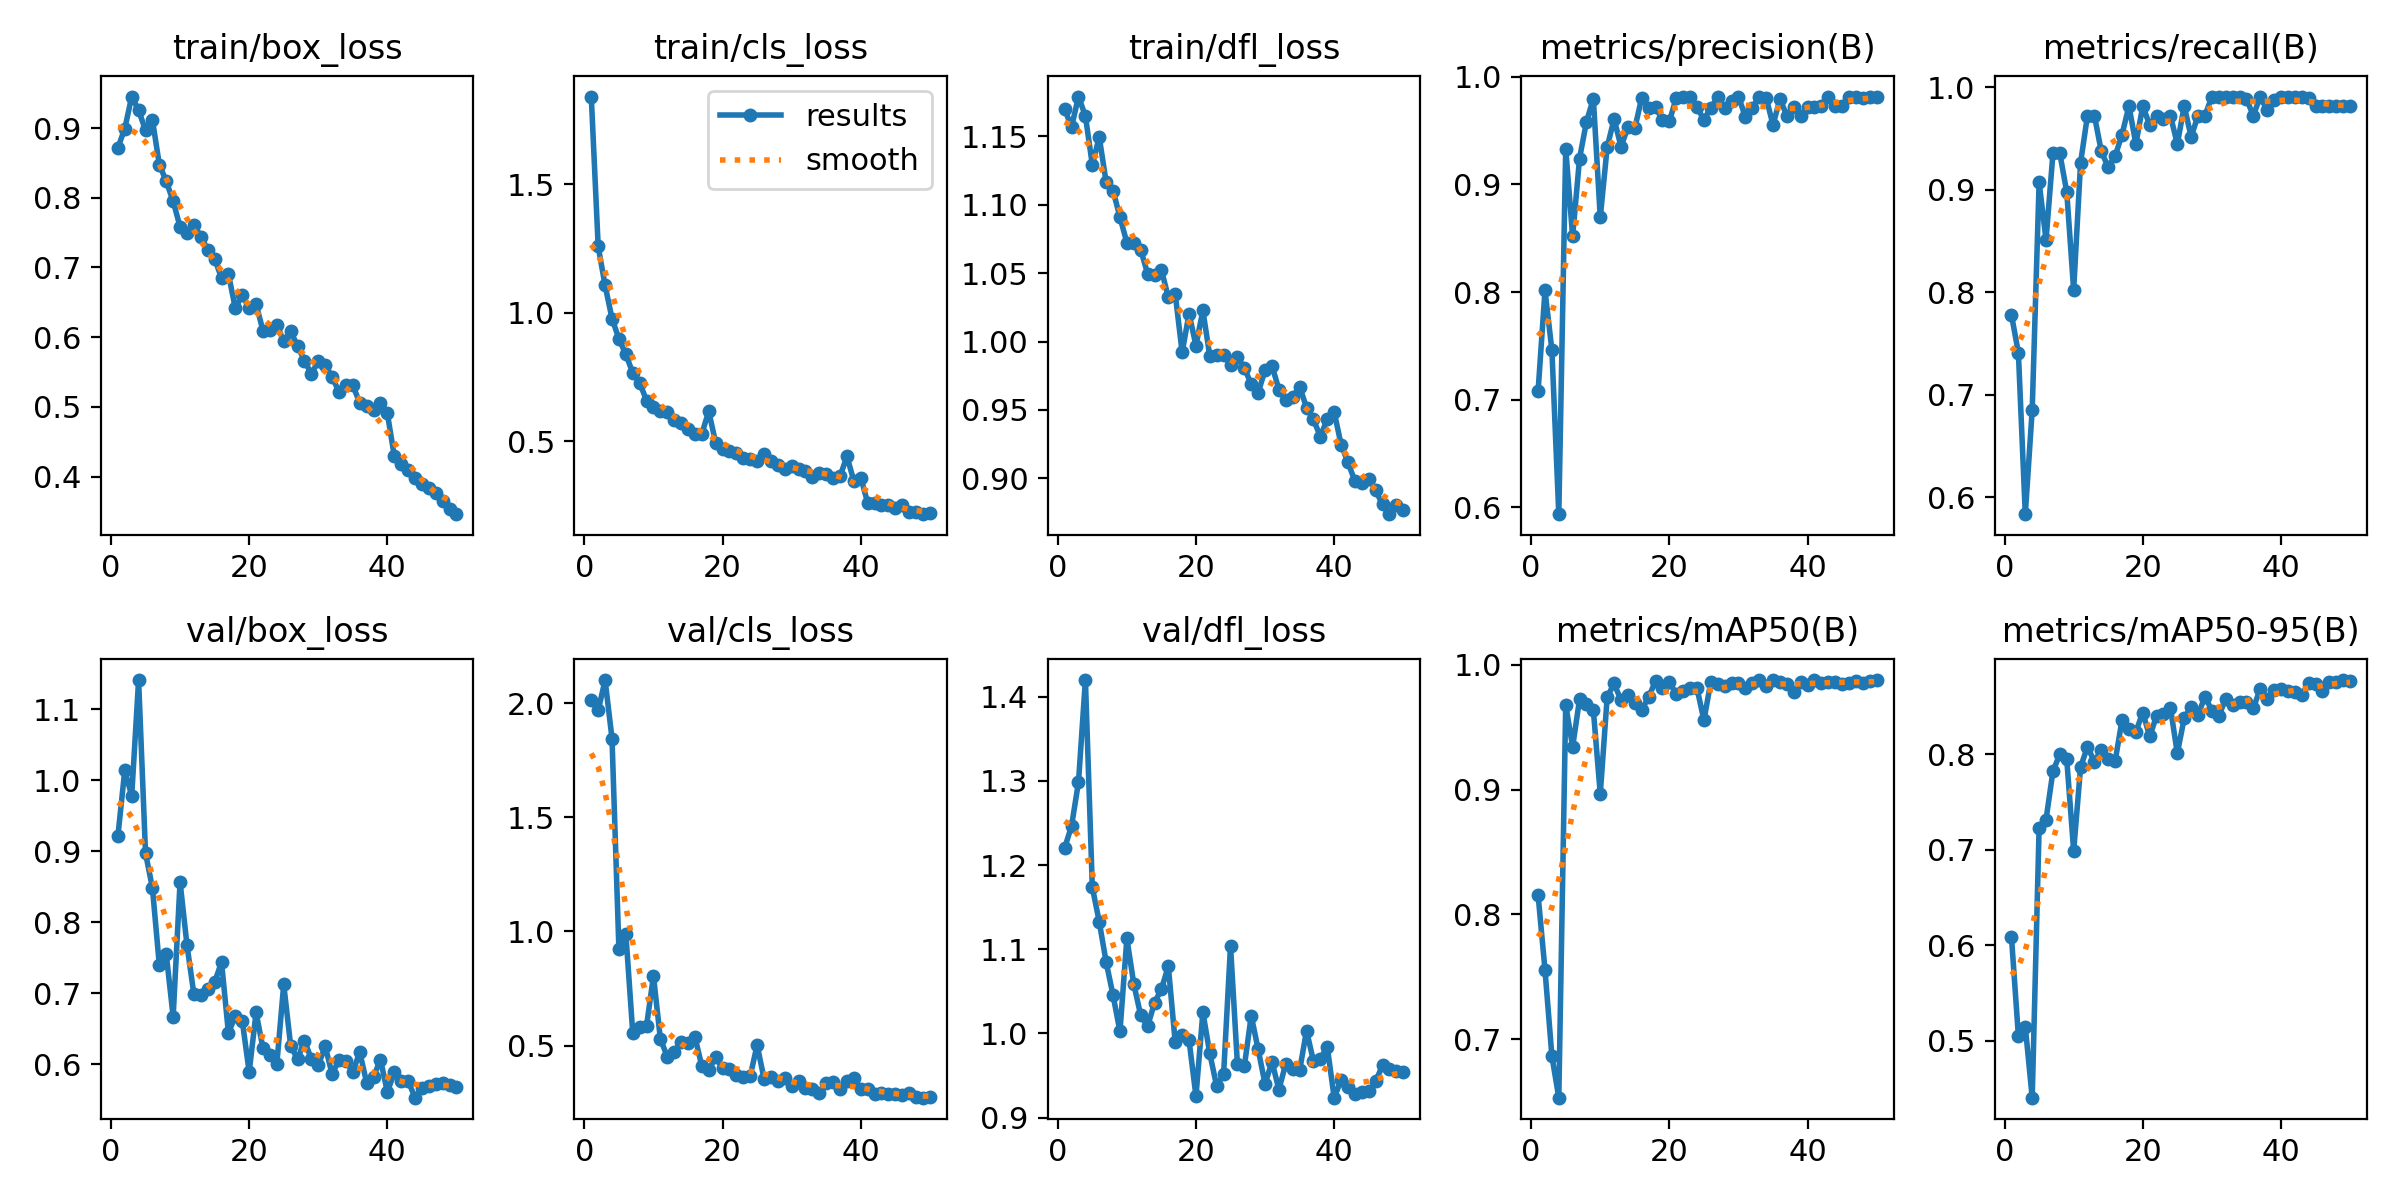

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/CONTAINER_OR_NOT-1/runs/detect/train/results.png', width=600)

/content


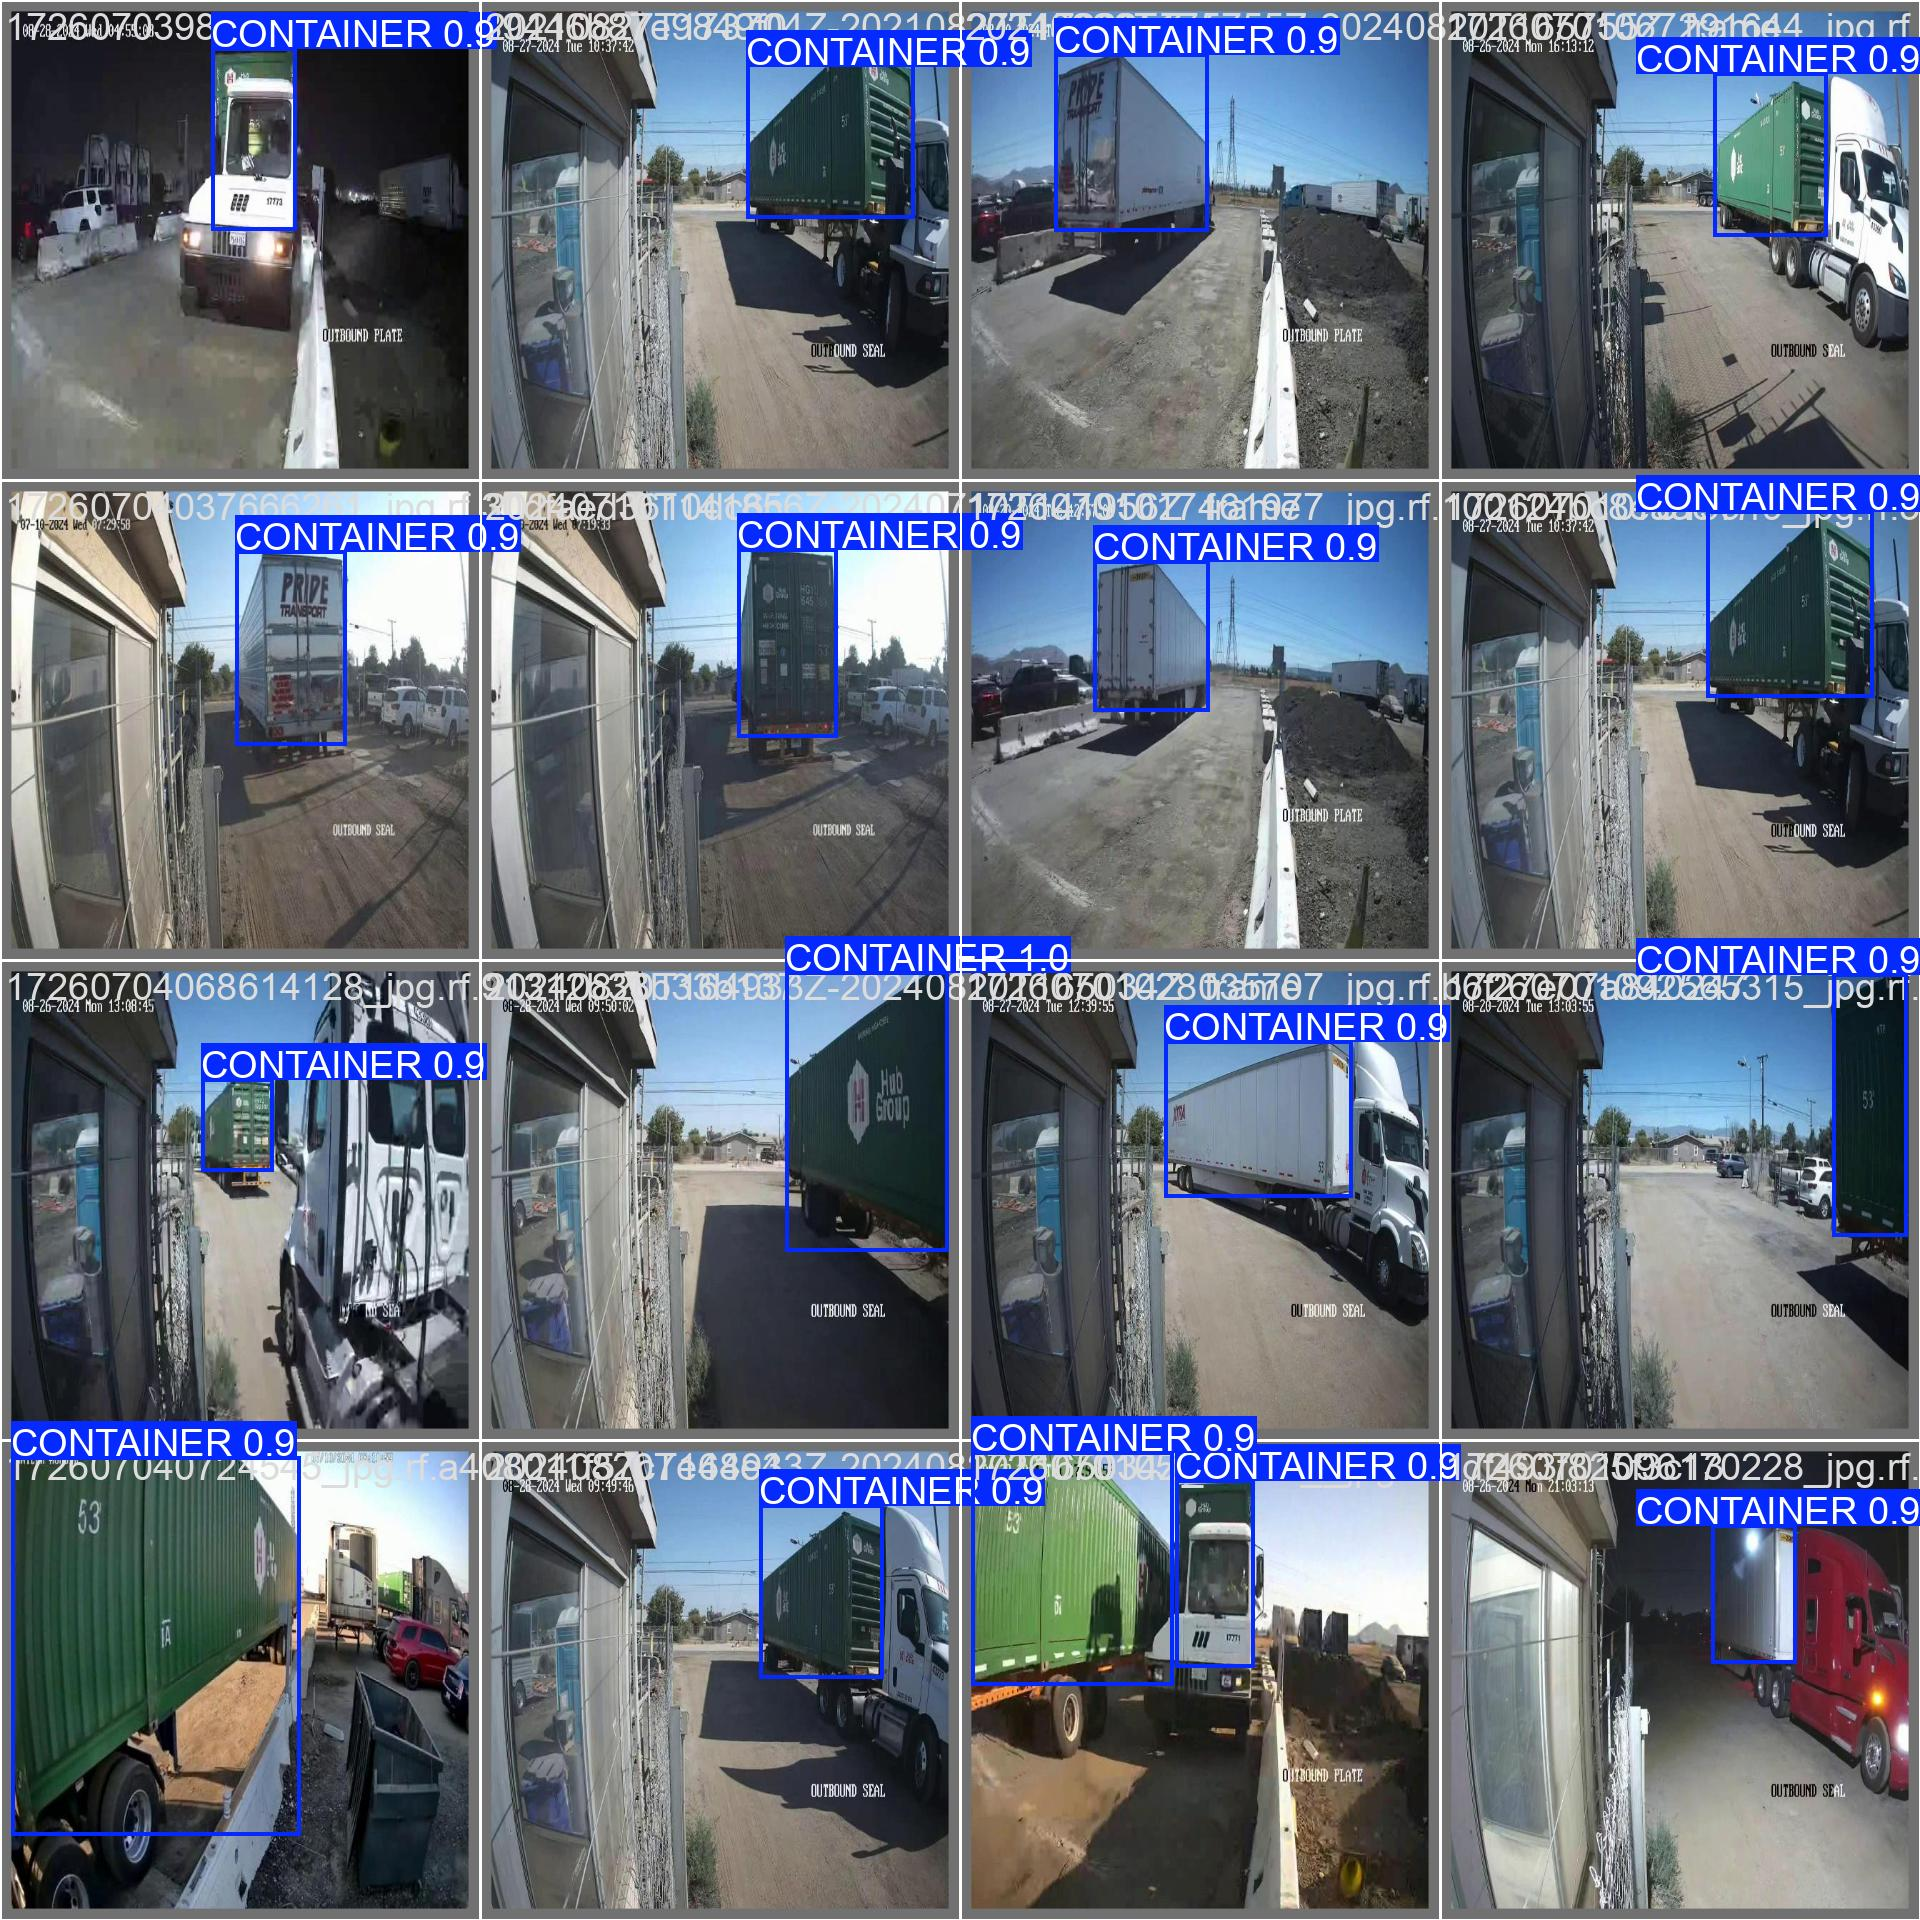

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/CONTAINER_OR_NOT-1/runs/detect/train/val_batch0_pred.jpg', width=600)

/content


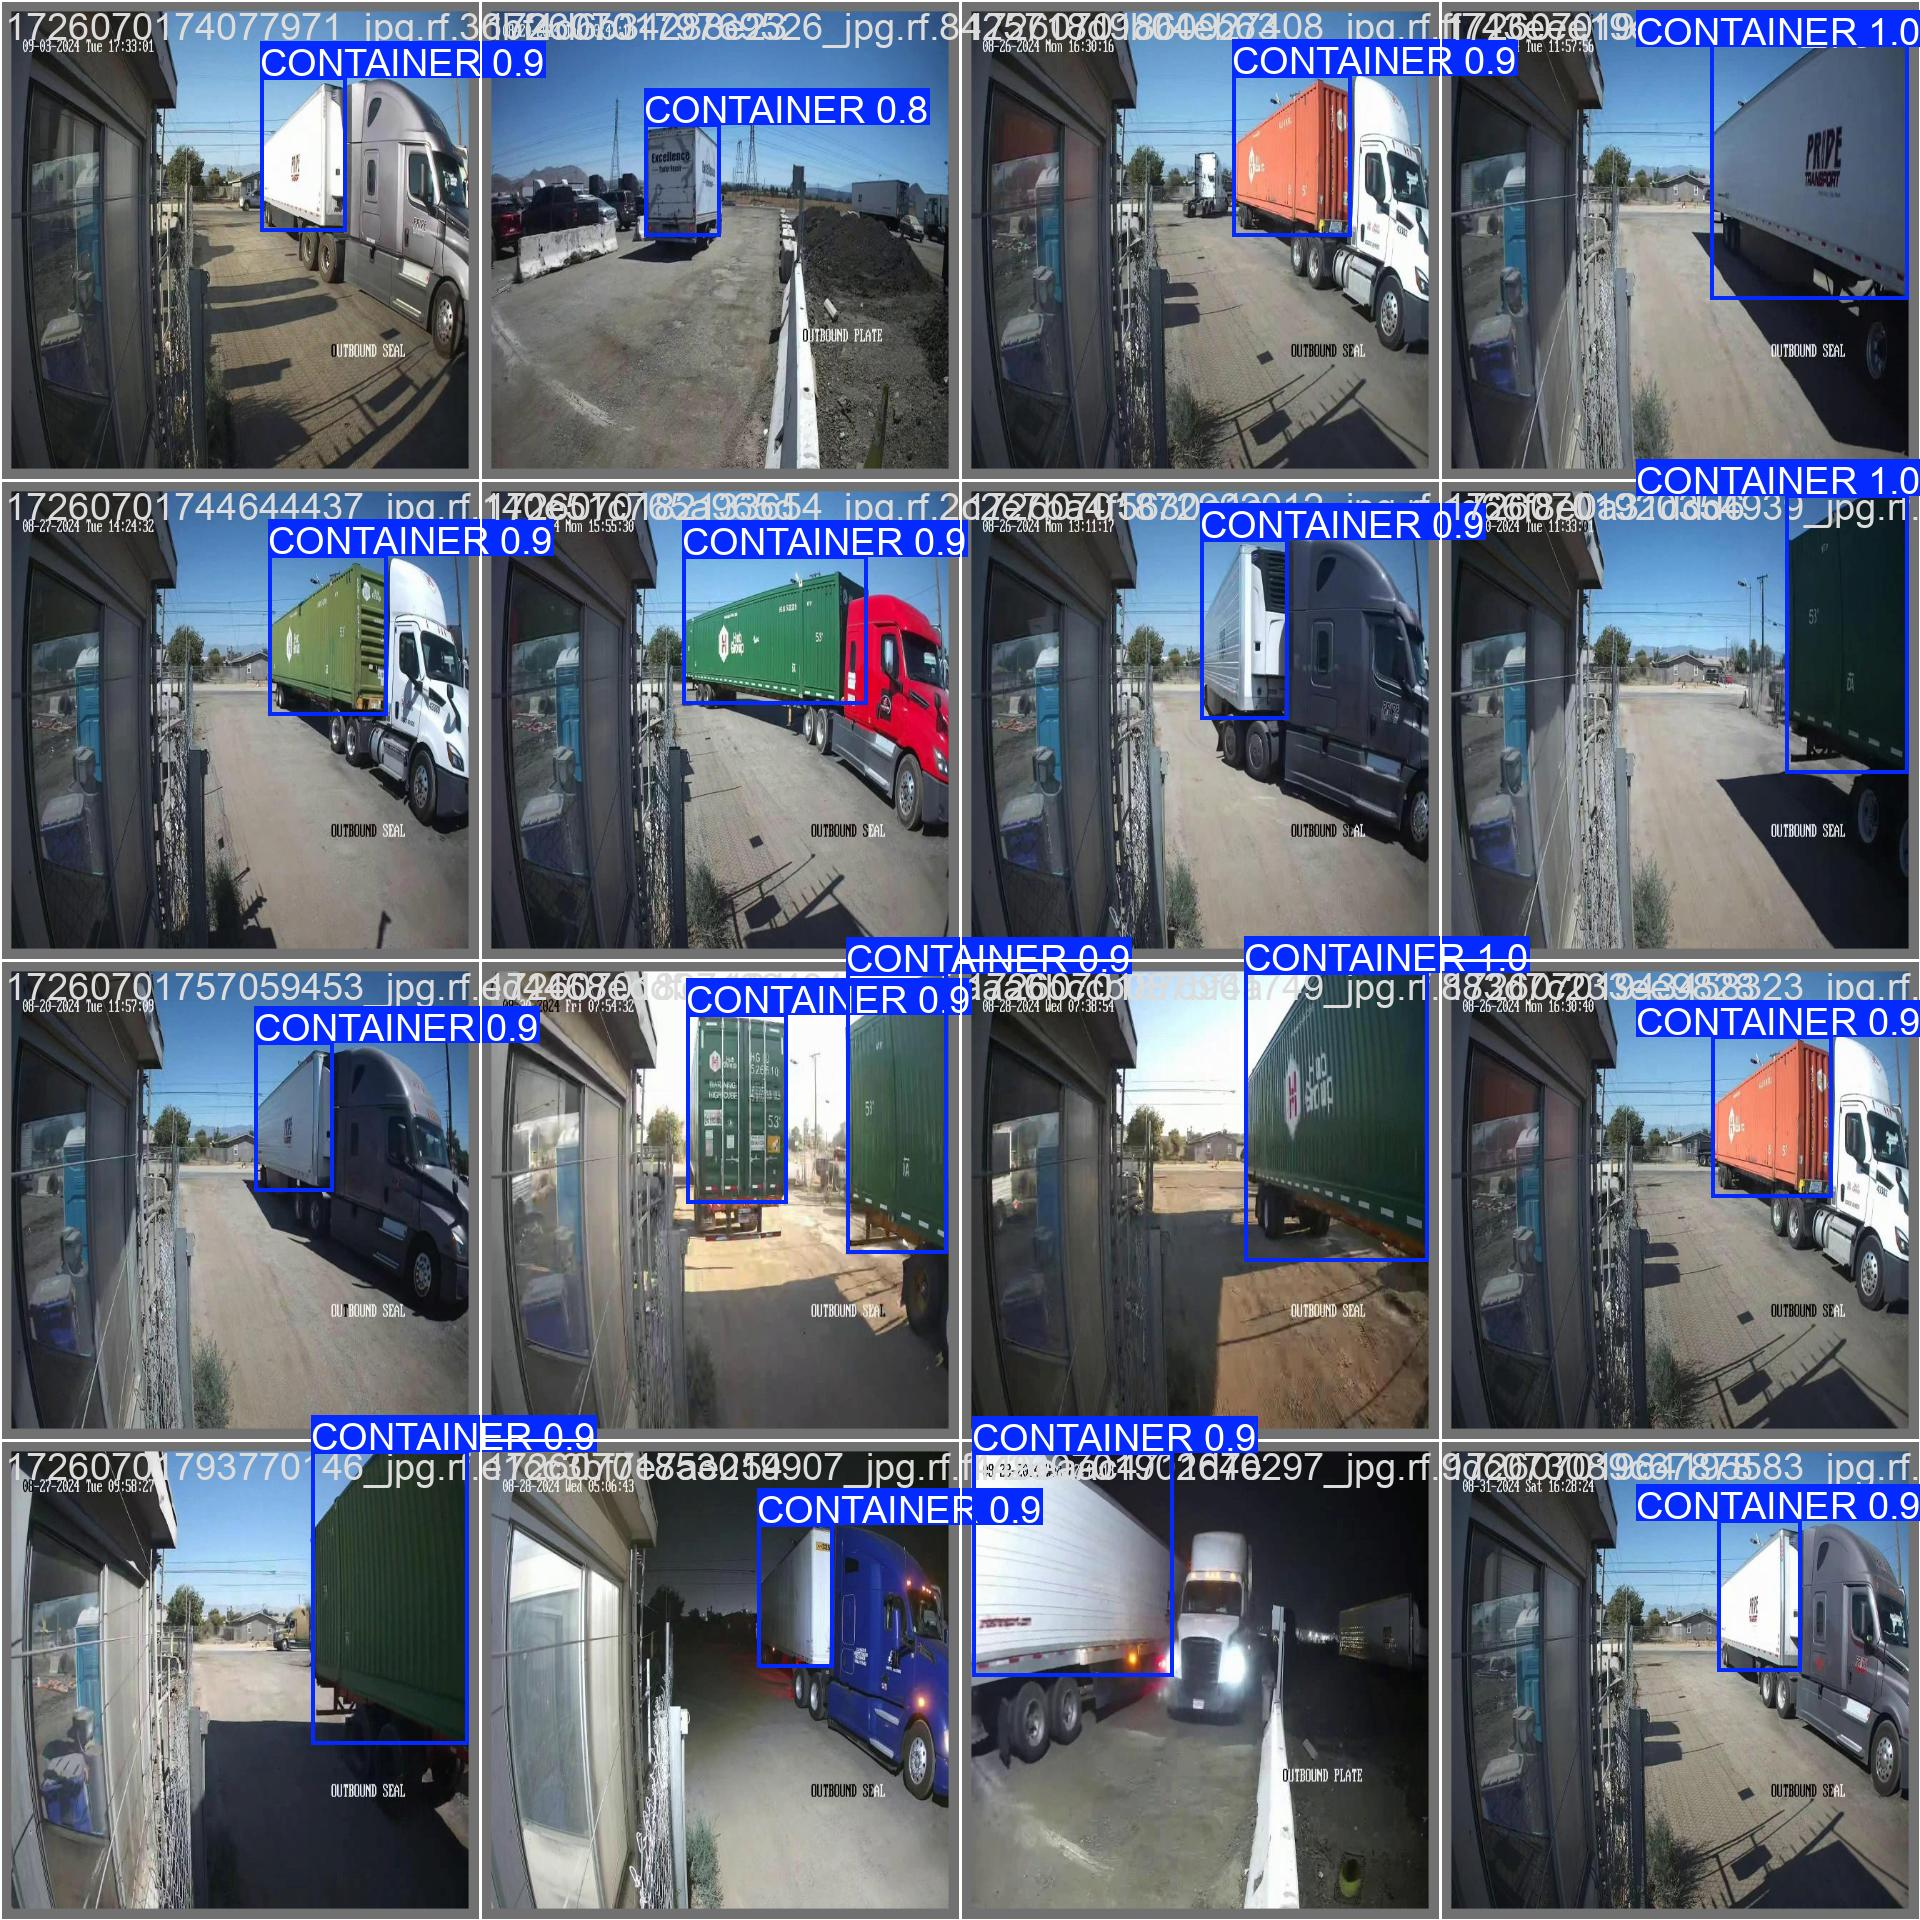

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/CONTAINER_OR_NOT-1/runs/detect/train/val_batch1_pred.jpg', width=600)

In [ ]:
ls /content/runs/detect/train/weights

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/datasets/CONTAINER_OR_NOT-1/runs/detect/train/weights/best.pt  data=data.yaml

/content
Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/CONTAINER_OR_NOT-1/valid/labels.cache... 103 images, 0 backgrounds, 0 corrupt: 100% 103/103 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:04<00:00,  1.55it/s]
                   all        103        108      0.981      0.981      0.987       0.88
Speed: 6.3ms preprocess, 9.7ms inference, 0.0ms loss, 10.2ms postprocess per image
Results saved to runs/detect/val10
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/datasets/CONTAINER_OR_NOT-1/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/47 /content/datasets/CONTAINER_OR_NOT-1/test/images/172607011033863_jpg.rf.b7eadf02bbf9d61cb9a97a7def620dec.jpg: 640x640 1 CONTAINER, 9.4ms
image 2/47 /content/datasets/CONTAINER_OR_NOT-1/test/images/17260701111328218_jpg.rf.b49c4ca8f93a66bfc0d3449c1ed49538.jpg: 640x640 2 CONTAINERs, 7.4ms
image 3/47 /content/datasets/CONTAINER_OR_NOT-1/test/images/1726070113892784_jpg.rf.21a84612223c6b8675a96ae16bc4293a.jpg: 640x640 1 CONTAINER, 7.3ms
image 4/47 /content/datasets/CONTAINER_OR_NOT-1/test/images/1726070114620024_jpg.rf.a0021e940e0c8c04946a8b83c5c8d30c.jpg: 640x640 1 CONTAINER, 7.3ms
image 5/47 /content/datasets/CONTAINER_OR_NOT-1/test/images/17260701160716696_jpg.rf.35875b988355faceae5cafc18decdb33.jpg: 640x640 1 CONTAINER, 7.3ms
image 6/47 /content/datasets/CONTAINER_OR_NOT-1/test/images/172607011644353

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[0:9]

In [ ]:
## Función auxialiar

def create_image_grid(image_list, grid_size, output_path):
    """
    Crea una cuadrícula de imágenes y guarda el resultado en un archivo.

    :param image_list: Lista de objetos de imagen PIL.
    :param grid_size: Tupla (filas, columnas) que define el tamaño de la cuadrícula.
    :param output_path: Ruta del archivo de salida donde se guardará la imagen de la cuadrícula.
    """
    # Verifica que el número de imágenes coincida con el tamaño de la cuadrícula
    if len(image_list) != grid_size[0] * grid_size[1]:
        raise ValueError("El número de imágenes no coincide con el tamaño de la cuadrícula.")

    # Obtener el tamaño de las imágenes
    img_width, img_height = image_list[0].size

    # Crear una nueva imagen para la cuadrícula
    grid_width = img_width * grid_size[1]
    grid_height = img_height * grid_size[0]
    grid_image = Image.new('RGB', (grid_width, grid_height))

    # Colocar las imágenes en la cuadrícula
    for index, img in enumerate(image_list):
        row = index // grid_size[1]
        col = index % grid_size[1]
        x = col * img_width
        y = row * img_height
        grid_image.paste(img, (x, y))

    # Guardar la imagen de la cuadrícula
    grid_image.save(output_path)

    return grid_image

In [ ]:
from PIL import Image
ls_img=[]
# Display each image
for image_path in image_paths:
    img_val = Image.open(image_path)
    ls_img.append(img_val)

# Grid image
grid_size = (3, 3)  # num filas y num columnas

# Ruta del archivo de salida
output_path = 'cuadricula.jpg'


grid_image=create_image_grid(ls_img, grid_size, output_path)

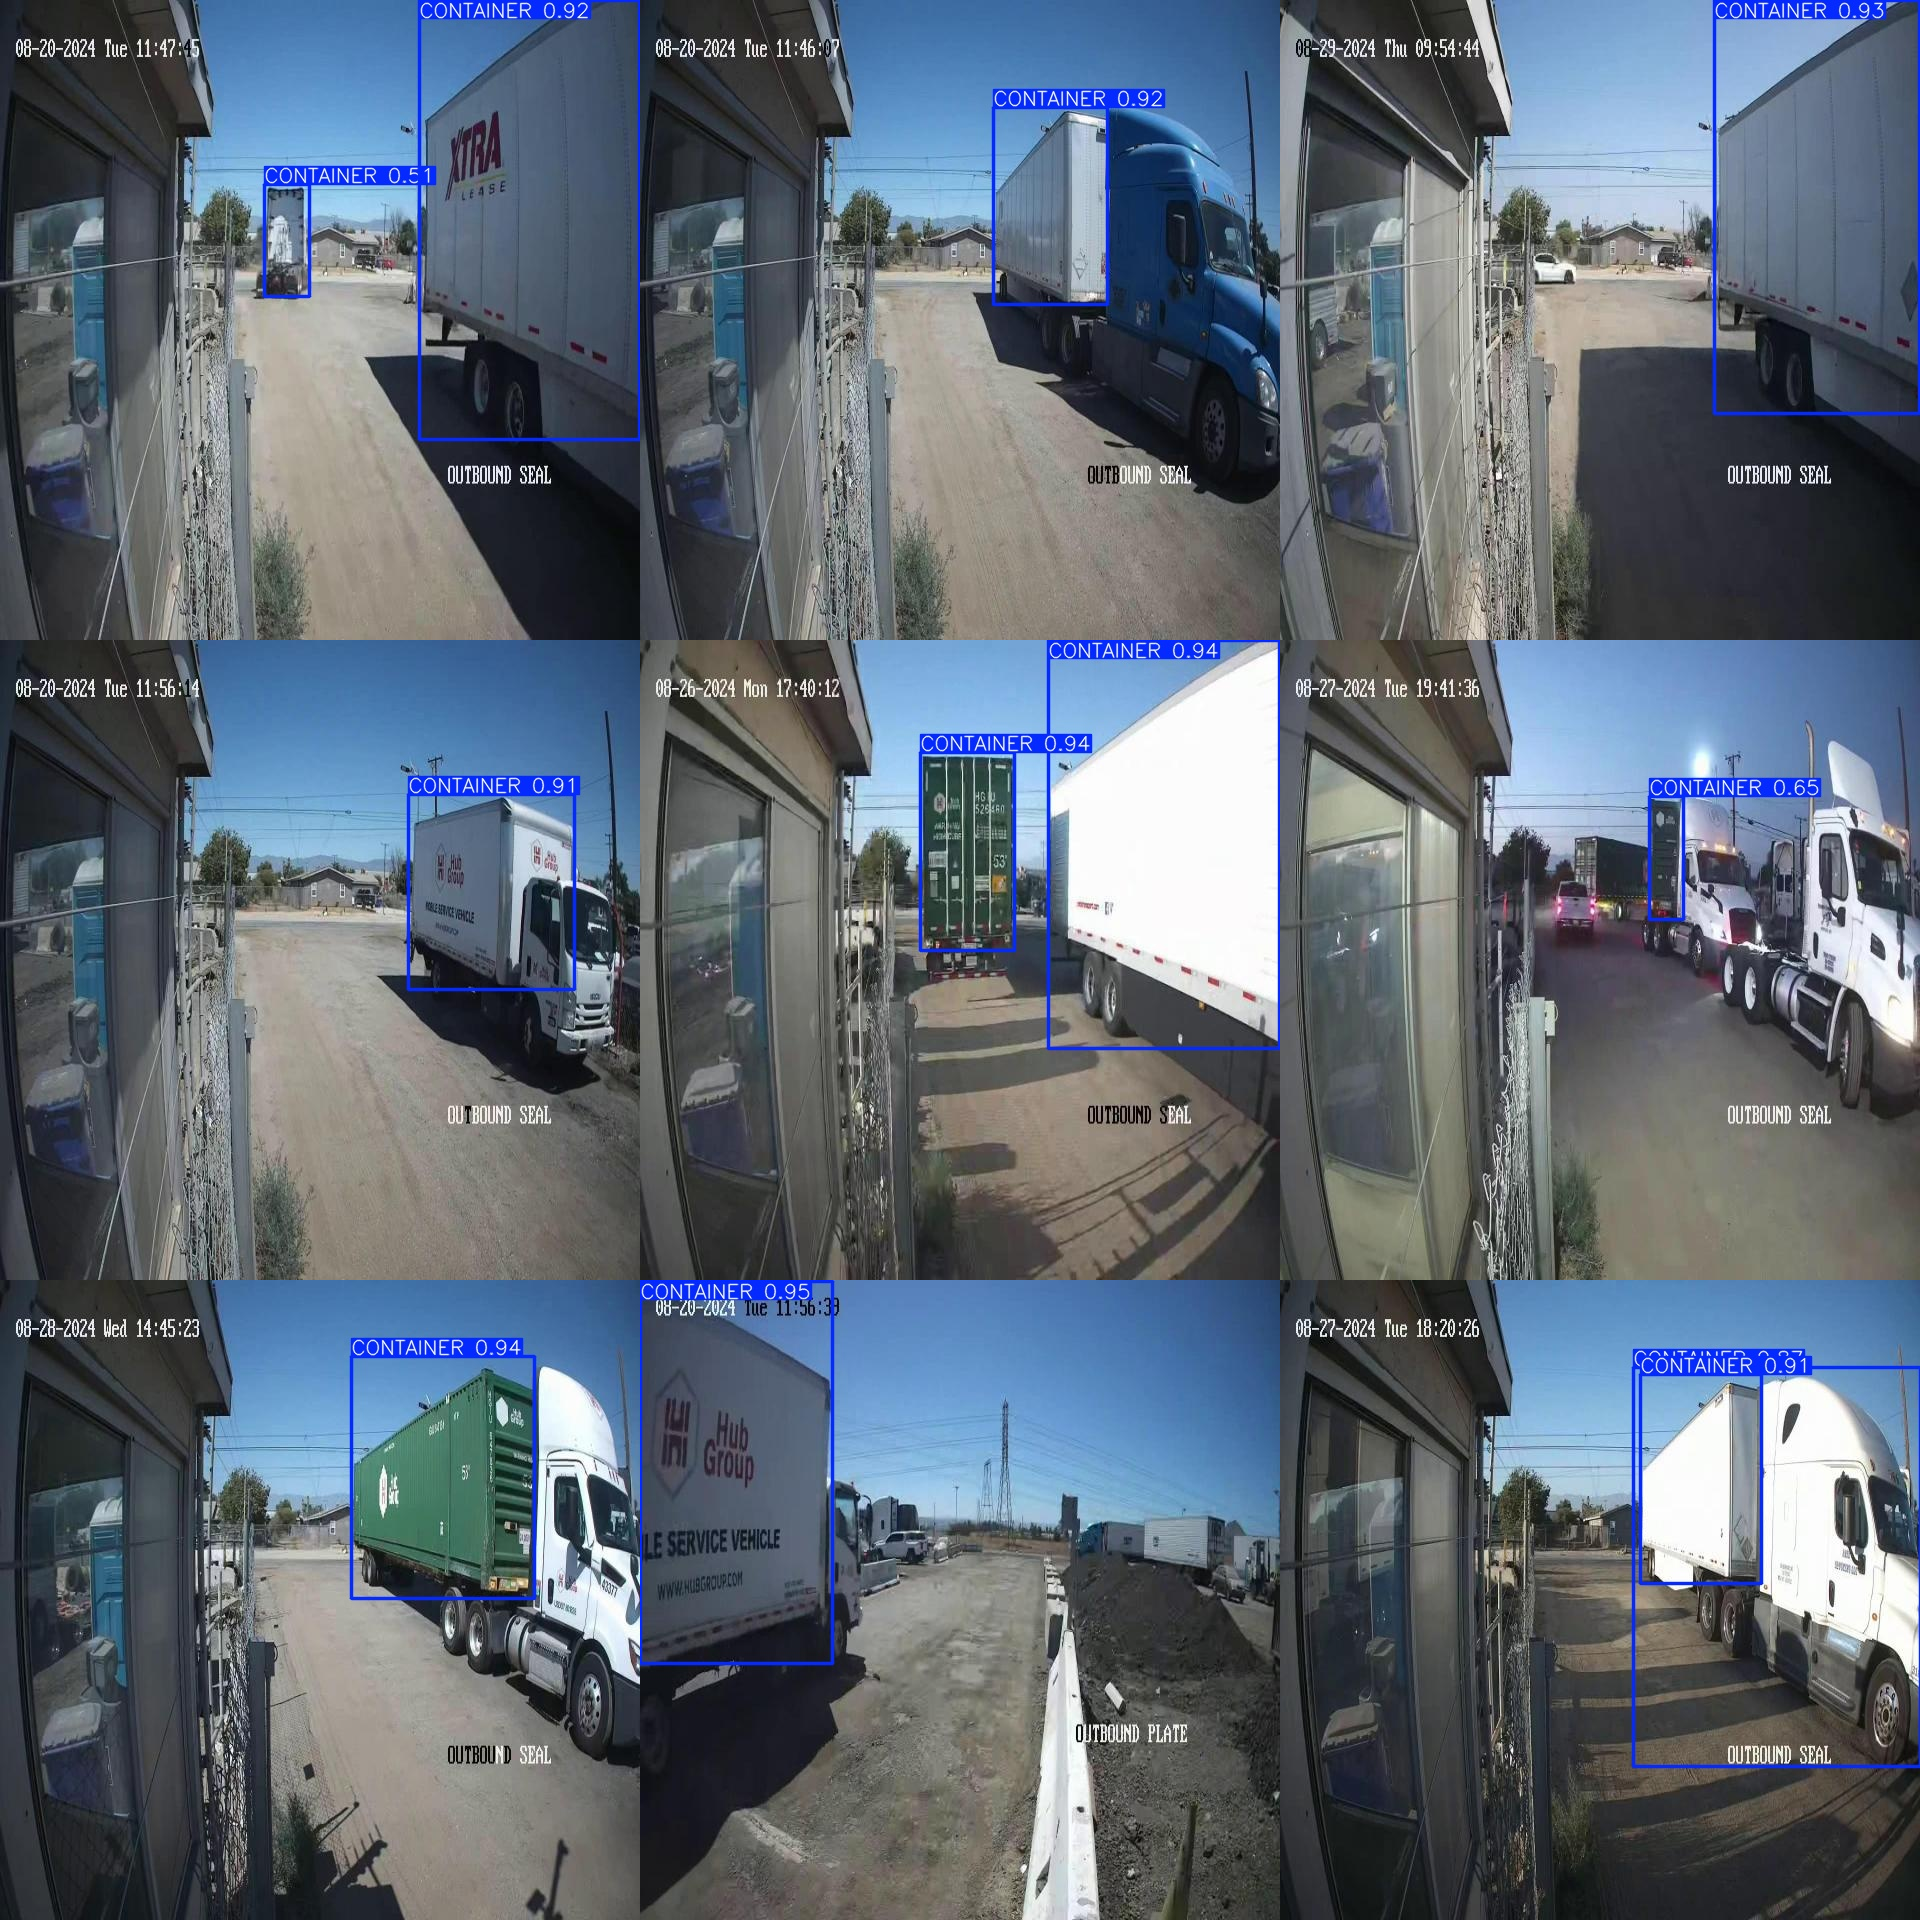

In [ ]:
grid_image

# Download train#

In [ ]:
!zip -r /content/Model_CONTAINER_DETECTION_train.zip /content/datasets/CONTAINER_OR_NOT-1/runs/detect/train

  adding: content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/ (stored 0%)
  adding: content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/F1_curve.png (deflated 19%)
  adding: content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/val_batch0_labels.jpg (deflated 6%)
  adding: content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/R_curve.png (deflated 19%)
  adding: content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/args.yaml (deflated 53%)
  adding: content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/confusion_matrix.png (deflated 39%)
  adding: content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/train_batch0.jpg (deflated 1%)
  adding: content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/val_batch2_pred.jpg (deflated 7%)
  adding: content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/results.png (deflated 8%)
  adding: content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/weights/ (stored 0%)
  adding: content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/weights/last.pt (de

In [ ]:
!zip -r /content/Model_CONTAINER_DETECTION_runs.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/val10/ (stored 0%)
  adding: content/runs/detect/val10/F1_curve.png (deflated 19%)
  adding: content/runs/detect/val10/val_batch0_labels.jpg (deflated 6%)
  adding: content/runs/detect/val10/R_curve.png (deflated 18%)
  adding: content/runs/detect/val10/confusion_matrix.png (deflated 39%)
  adding: content/runs/detect/val10/val_batch2_pred.jpg (deflated 6%)
  adding: content/runs/detect/val10/val_batch1_labels.jpg (deflated 6%)
  adding: content/runs/detect/val10/P_curve.png (deflated 24%)
  adding: content/runs/detect/val10/val_batch2_labels.jpg (deflated 7%)
  adding: content/runs/detect/val10/val_batch0_pred.jpg (deflated 6%)
  adding: content/runs/detect/val10/confusion_matrix_normalized.png (deflated 36%)
  adding: content/runs/detect/val10/val_batch1_pred.jpg (deflated 6%)
  adding: content/runs/detect/val10/PR_curve.png (deflated 28%)
  adding: content/runs/detect/train2/

In [ ]:
!zip -r "/content/Model_CONTAINER_DETECTION_dataset.zip" "/content/datasets"

  adding: content/datasets/ (stored 0%)
  adding: content/datasets/CONTAINER_OR_NOT-1/ (stored 0%)
  adding: content/datasets/CONTAINER_OR_NOT-1/valid/ (stored 0%)
  adding: content/datasets/CONTAINER_OR_NOT-1/valid/labels/ (stored 0%)
  adding: content/datasets/CONTAINER_OR_NOT-1/valid/labels/17260702015077622_jpg.rf.6777cdfe97352908e5e3da209c4f1029.txt (deflated 17%)
  adding: content/datasets/CONTAINER_OR_NOT-1/valid/labels/20240828T010554Z-20240828T010655Z_frame_521_jpeg.rf.1b75df4c2a4f30be8c46ae09e283c866.txt (deflated 20%)
  adding: content/datasets/CONTAINER_OR_NOT-1/valid/labels/1726070375862432_jpg.rf.a626586e183dd70bbf0bf6cd2b221731.txt (deflated 14%)
  adding: content/datasets/CONTAINER_OR_NOT-1/valid/labels/17260701545954888_jpg.rf.5e6798fcea44fc77188c9c6d0d859d81.txt (deflated 21%)
  adding: content/datasets/CONTAINER_OR_NOT-1/valid/labels/17260703466364791_jpg.rf.9d75aab8757d8ac88981204e4a37af36.txt (deflated 24%)
  adding: content/datasets/CONTAINER_OR_NOT-1/valid/labels

Convert to ONX format

In [54]:
from pickle import TRUE
model = YOLO(f'{HOME}/datasets/CONTAINER_OR_NOT-1/runs/detect/train/weights/best.pt')
model.export(format='onnx', dynamic=True )

Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)

ONNX: starting export with onnx 1.16.2 opset 19...
ONNX: export success ✅ 0.8s, saved as '/content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/weights/best.onnx' (11.5 MB)

Export complete (2.6s)
Results saved to /content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/weights/best.onnx imgsz=640 data=data.yaml  
Visualize:       https://netron.app


'/content/datasets/CONTAINER_OR_NOT-1/runs/detect/train/weights/best.onnx'